In [6]:
import PIL
!ls speaker_and_light_raw/light

IMG_20180501_141316.jpg  IMG_20180501_141422.jpg    IMG_20180501_141442.jpg
IMG_20180501_141318.jpg  IMG_20180501_141424.jpg    IMG_20180501_141443_1.jpg
IMG_20180501_141320.jpg  IMG_20180501_141426.jpg    IMG_20180501_141443.jpg
IMG_20180501_141323.jpg  IMG_20180501_141430.jpg    IMG_20180501_141444.jpg
IMG_20180501_141327.jpg  IMG_20180501_141432.jpg    IMG_20180501_141450.jpg
IMG_20180501_141331.jpg  IMG_20180501_141433.jpg    IMG_20180501_141454.jpg
IMG_20180501_141335.jpg  IMG_20180501_141434.jpg    IMG_20180501_141457.jpg
IMG_20180501_141338.jpg  IMG_20180501_141435.jpg    IMG_20180501_141505.jpg
IMG_20180501_141341.jpg  IMG_20180501_141436_1.jpg  IMG_20180501_141512.jpg
IMG_20180501_141346.jpg  IMG_20180501_141436.jpg    IMG_20180501_141518.jpg
IMG_20180501_141350.jpg  IMG_20180501_141437.jpg    IMG_20180501_141530.jpg
IMG_20180501_141357.jpg  IMG_20180501_141438_1.jpg  IMG_20180501_141536.jpg
IMG_20180501_141402.jpg  IMG_20180501_141438.jpg    IMG_20180501_141540.jpg
IMG_201805

In [17]:
import os
import sys
basicPath='speaker_and_light_raw'
speakerList=os.listdir('speaker_and_light_raw/speaker')
lightList=os.listdir('speaker_and_light_raw/light')
os.path.join

'dsf/asf'

In [24]:
speakerList1=[os.path.join(basicPath,'speaker',i) for i in speakerList ]
lightList1=[os.path.join(basicPath,'light',i) for i in lightList ]

In [26]:
PIL.Image.open(lightList1[0])

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [29]:
from PIL import Image

In [30]:
Image.open(speakerList1[0])

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [42]:
speakerList1[:30]
from shutil import copyfile

copyfile(src, dst)


import shutil
shutil.copy2('/src/dir/file.ext', '/dst/dir/newname.ext') # complete target filename given
shutil.copy2('/src/file.ext', '/dst/dir') # target filename is /dst/dir/file.ext

IsADirectoryError: [Errno 21] Is a directory: 'speaker_and_light'

In [43]:
from keras.applications import ResNet50
from keras.models import Sequential
from keras.layers import Dense, Flatten, GlobalAveragePooling2D
num_classes=2
resnetWeightsPath= "resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5"

/home/pau/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [44]:
model=Sequential()
model.add(ResNet50(include_top=False,pooling='avg'
                  ,weights=resnetWeightsPath))
model.add(Dense(num_classes,activation='softmax'))
model.layers[0].trainable = False
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet50 import preprocess_input
image_size=224
data_generator=ImageDataGenerator(preprocessing_function=preprocess_input)
train_generator = data_generator.flow_from_directory('speaker_and_light/train',target_size=(image_size,image_size),batch_size=24,class_mode='categorical')
validation_generator = data_generator.flow_from_directory('speaker_and_light/val',target_size=(image_size,image_size),batch_size=20,class_mode='categorical')
model.fit_generator(train_generator,steps_per_epoch=3,epochs=10,
                   validation_data=validation_generator,validation_steps=1)

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Found 70 images belonging to 2 classes.
Found 28 images belonging to 2 classes.
Epoch 1/10
3/3 [==============================] - 64s 21s/step - loss: 0.7014 - acc: 0.6027 - val_loss: 0.3458 - val_acc: 0.8500
Epoch 2/10
3/3 [==============================] - 42s 14s/step - loss: 0.3994 - acc: 0.8032 - val_loss: 0.2225 - val_acc: 0.9500
Epoch 3/10
3/3 [==============================] - 38s 13s/step - loss: 0.2524 - acc: 0.9422 - val_loss: 0.1695 - val_acc: 1.0000
Epoch 4/10
3/3 [==============================] - 39s 13s/step - loss: 0.1987 - acc: 0.9711 - val_loss: 0.1300 - val_acc: 1.0000
Epoch 5/10
3/3 [==============================] - 38s 13s/step - loss: 0.1513 - acc: 0.9860 - val_loss: 0.1080 - val_acc: 1.0000
Epoch 6/10
3/3 [==============================] - 41s 14s/step - loss: 0.1310 - acc: 1.0000 - val_loss: 0.0917 - val_acc: 1.0000


In [45]:
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing.image import load_img, img_to_array

In [56]:
import numpy as np
#np.array(load_img(lightList1[40],target_size=(224,224))).reshape(1,224,224,3)

In [62]:
model.predict(np.array(load_img(speakerList1[45],target_size=(224,224))).reshape(1,224,224,3))

array([[0.02172118, 0.9782788 ]], dtype=float32)

# check list

In [94]:
checkList=os.listdir('check')

checkList=[os.path.join('check',i) for i in checkList ]

In [95]:
model.predict(np.array(load_img(speakerList1[0],target_size=(224,224))).reshape(1,224,224,3))

array([[0.00355938, 0.9964406 ]], dtype=float32)

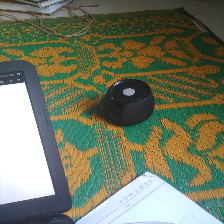

SPEAKER 83.06280970573425  percent


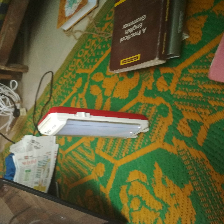

LIGHT  60.557180643081665  percent


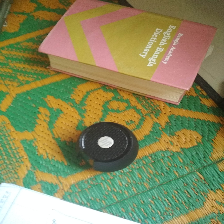

SPEAKER 85.43845415115356  percent


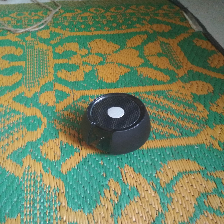

SPEAKER 78.39946746826172  percent


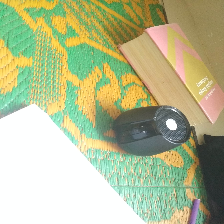

SPEAKER 90.86211919784546  percent


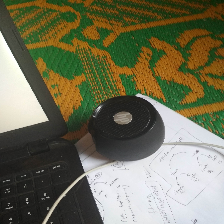

SPEAKER 98.32425117492676  percent


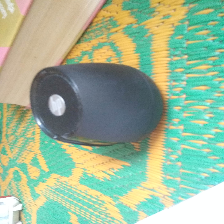

SPEAKER 85.75747013092041  percent


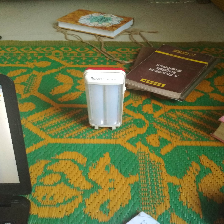

SPEAKER 50.32690763473511  percent


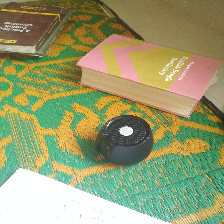

SPEAKER 92.73571968078613  percent


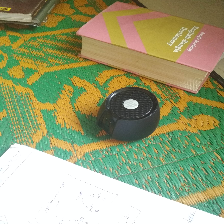

SPEAKER 88.87426257133484  percent


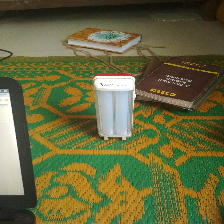

LIGHT  64.33780789375305  percent


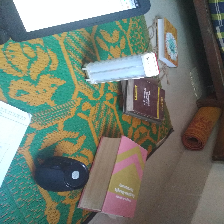

SPEAKER 86.07538342475891  percent


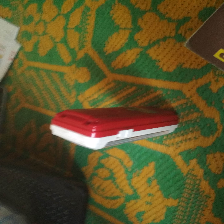

LIGHT  64.78386521339417  percent


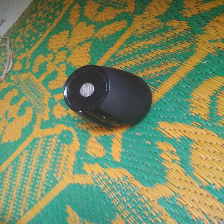

SPEAKER 95.28805613517761  percent


In [96]:
from IPython import display
for i in range(len(checkList)):
    display.display(load_img(checkList[i],target_size=(224,224)))
    pred = model.predict(np.array(load_img(checkList[i],target_size=(224,224))).reshape(1,224,224,3))
    if pred[0][0]>pred[0][1]:
        print('LIGHT ',pred[0][0]*100,' percent')
    else:
        print('SPEAKER',pred[0][1]*100,' percent')
    

In [91]:
from PIL import Image
Image.open(checkList[i],target_size=(224,224))
#Image(filename='data/empire.jpg')

TypeError: open() got an unexpected keyword argument 'target_size'

In [68]:
pred[0]

array([0.1693719, 0.8306281], dtype=float32)